# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [98]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [99]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Merge the DataFrames

In [100]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [101]:
#  1. Get the total rides for each city type
rides_count = pyber_data_df.groupby(['type']).count()['ride_id']
rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [102]:
# 2. Get the total drivers for each city type
drivers_count = city_data_df.groupby(['type']).sum()['driver_count']
drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [103]:
#  3. Get the total amount of fares for each city type
fares_sum = pyber_data_df.groupby(['type']).sum()['fare']
fares_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [104]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = fares_sum / rides_count
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [105]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = fares_sum / drivers_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [106]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
            "Total Rides": rides_count,
            "Total Drivers": drivers_count,
            "Total Fares": fares_sum,
            "Average Fare per Ride": average_fare_per_ride,
            "Average Fare per Driver": average_fare_per_driver
})
pyber_summary_df

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
type,,,,,
Rural,55.486282,34.623440,78,4327.93,125
Suburban,39.502714,30.970128,490,19356.33,625
Urban,16.571468,24.525772,2405,39854.38,1625


In [107]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [108]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
Rural,$55.49,$34.62,78,"$4,327.93",125
Suburban,$39.50,$30.97,490,"$19,356.33",625
Urban,$16.57,$24.53,"2,405","$39,854.38","1,625"


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [109]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [110]:
# change date to datetime data type
pyber_data_df['date']=pd.to_datetime(pyber_data_df['date'])

In [111]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_per_day = pyber_data_df.groupby(['type','date']).sum()['fare']
total_fare_per_day

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
       2019-01-08 06:19:45    19.39
       2019-01-09 15:30:35    31.84
       2019-01-11 04:39:27    16.42
       2019-01-14 07:09:17    18.05
       2019-01-14 15:58:48    54.10
       2019-01-15 21:44:26    30.26
       2019-01-18 00:46:28    15.12
       2019-01-18 07:36:46    43.57
       2019-01-19 11:40:46    49.44
       2019-01-19 12:38:07    38.68
       2019-01-19 20:21:54    56.78
       2019-01-22 12:42:55    13.50
       2019-01-22 15:36:24    10.11
       2019-01-23 06:52:00    40.24
       2019-01-24 13:32:12    34.74
       2019-01-27 17:33:41    42.68
       2019-01-27 18:43:05    38.42
       2019-01-28 15:55:33    31.25
       2019-01-30 00:05:47    20.76
       2019-01-30 01:40:16    37.05
       2019-01-30 10:55:23    51.39
       2019-01-31 17:57:25    58.29
 

In [112]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fare_per_day = total_fare_per_day.reset_index()
total_fare_per_day.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [113]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_day_pivot = total_fare_per_day.pivot(index='date', columns='type', values='fare')
total_fare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [114]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_fare_per_day = total_fare_per_day_pivot.loc['2019-01-01':'2019-04-28']
jan_apr_fare_per_day.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [115]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_apr_fare_per_day.index = pd.to_datetime(jan_apr_fare_per_day.index)

In [116]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fare_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6 KB


In [117]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_apr_fare_per_week = jan_apr_fare_per_day.resample("W").sum()
jan_apr_fare_per_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


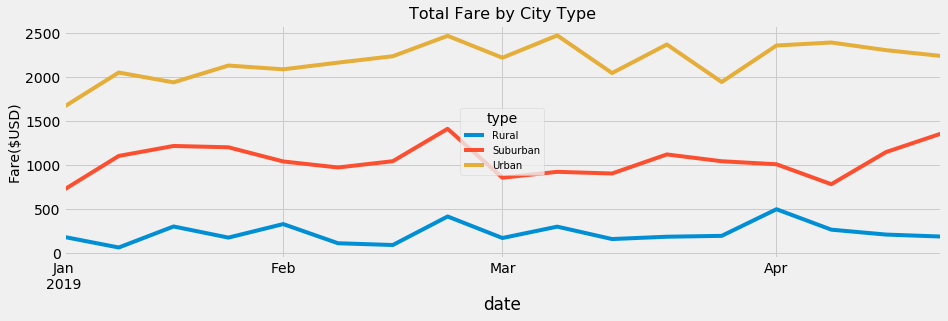

In [127]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

ax = each_week_fares.plot(figsize=(14,4))

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax.set_title("Total Fare by City Type", fontsize = "16")
ax.set_ylabel("Fare($USD)",fontsize = "14")
ax.legend(["Rural","Suburban", "Urban", ], title="type", loc="center", fontsize="10", mode="Expanded")

# Save the figure.
plt.savefig("analysis/Fig8.png")
plt.show()